In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')

import statsmodels.api as sm

from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
#LOAD THE DATASET
df_data=pd.read_csv('tips.csv')
#print the dataset to see if it is correctly loaded or not
df_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
#Print all the columns name
df_data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [4]:
#Summary of the numeric columns
df_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
#Summary of character columns
df_data.describe(include=['object'])

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [6]:
#See if there is any missing value or not
df_data.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [7]:
df_data.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


# We are interested in 2 variables  : 1) Total Bill and 2)Tip



First plot the scatter plot for total_bill and tip amount

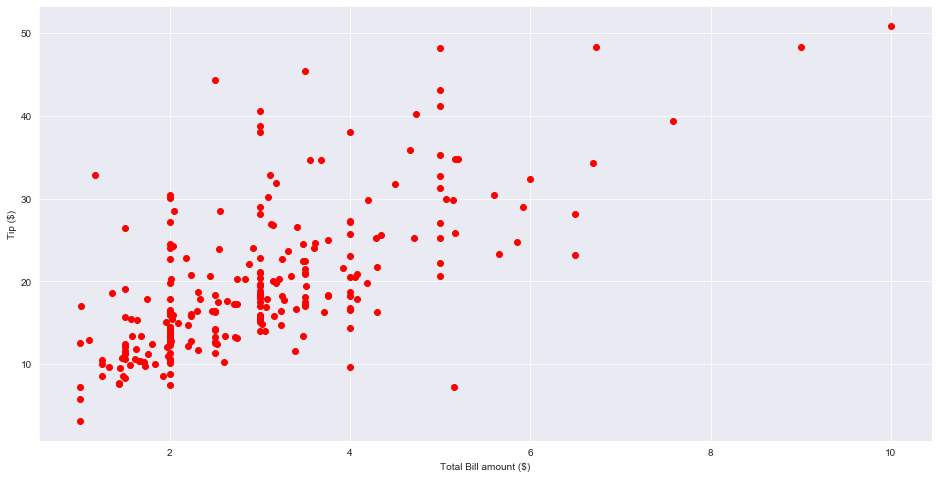

In [8]:
plt.figure(figsize=(16, 8))
plt.scatter(
    df_data['tip'],
    df_data['total_bill'],
    c='red'
)
plt.xlabel("Total Bill amount ($)")
plt.ylabel("Tip ($)")
plt.show()

In [9]:
#Prepare independent and Dependent variables
X=df_data['total_bill']
y=df_data['tip']
print(X.shape)
print(y.shape)

#We need to add constant(intercept) in our model.For this we need to use add_constant method of statsmodel liibrary
X=sm.add_constant(X)
all_total_bill=X['total_bill']

(244,)
(244,)


C:\Users\ARPIT\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [10]:
model=sm.OLS(y,X).fit()
print(model.summary())
fitted_values=model.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 11 Nov 2019   Prob (F-statistic):           6.69e-34
Time:                        10:21:26   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

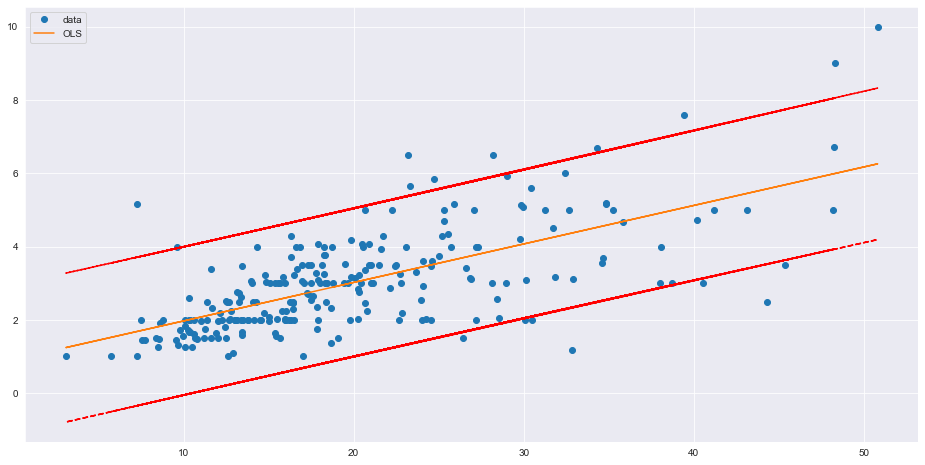

In [11]:
#Plot the Regression Line
prstd, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(16,8))

# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(all_total_bill, y, 'o', label="data" )

#Plot the TREND LINE
ax.plot(all_total_bill, fitted_values, label="OLS")

# plot upper and lower ci values
ax.plot(all_total_bill, confidence_interval_upper, 'r--')
ax.plot(all_total_bill, confidence_interval_lower, 'r--')

ax.legend(loc='best')

We can observe that many data points are outside the confidence interval

Text(0.5, 1.0, 'Fitted OLS Model')

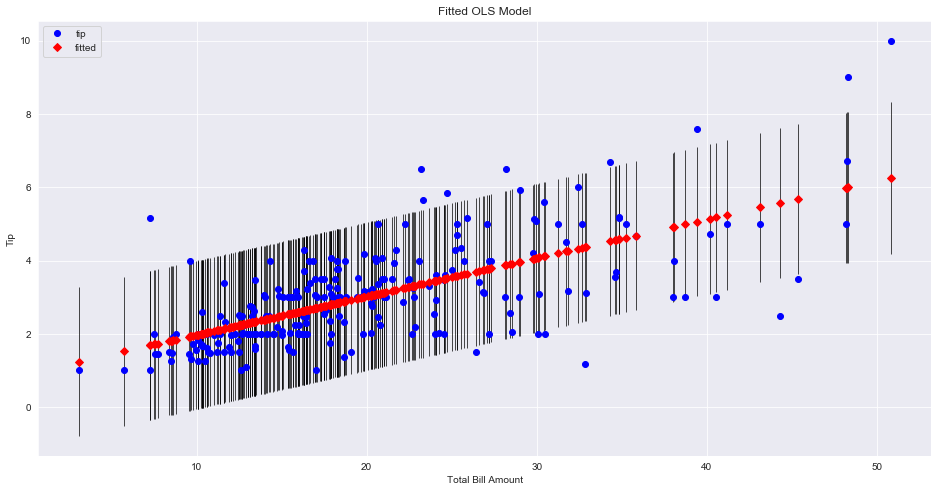

In [12]:
#scatterplot of observed values compared to fitted values
fig, ax = plt.subplots(figsize=(16,8))
fig = sm.graphics.plot_fit(model, 'total_bill', ax=ax)
ax.set_ylabel("Tip")
ax.set_xlabel("Total Bill Amount")
ax.set_title("Fitted OLS Model")

# Residual Analysis

In [13]:
#Get the Residuals of the model
residuals=model.resid
print(residuals)

0     -1.694636
1     -0.346223
2      0.373165
3     -0.097250
4      0.107178
         ...   
239    1.950869
240   -1.774836
241   -1.301175
242   -1.041807
243    0.107370
Length: 244, dtype: float64


Text(0, 0.5, 'Residuals')

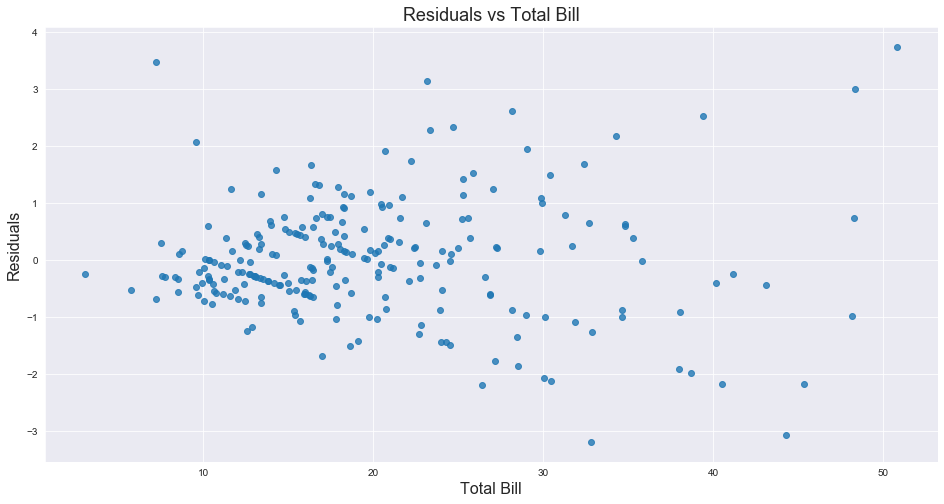

In [14]:
#PLOTTING THE RESIDUAL VS Total Bill VALUES
fig, ax = plt.subplots(figsize=(16,8))
ax=sns.regplot(x=all_total_bill, y=residuals, lowess=True, line_kws={'color': 'green'},fit_reg=False)
ax.set_title('Residuals vs Total Bill', fontsize=18)


ax.set_xlabel(xlabel='Total Bill',fontsize=16)
ax.set_ylabel(ylabel='Residuals',fontsize=16)

Text(0, 0.5, 'Residuals')

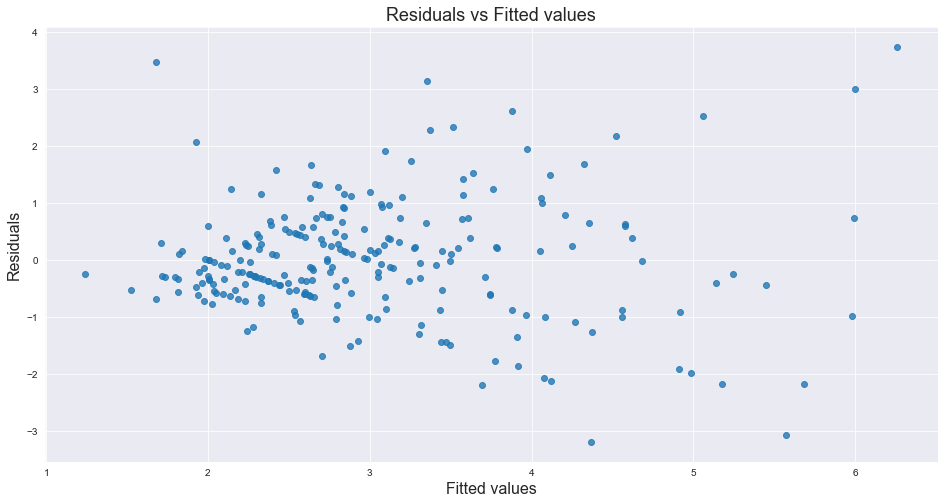

In [15]:
#PLOTTING THE RESIDUAL VS Fitted Tip VALUES
fig, ax = plt.subplots(figsize=(16,8))
ax=sns.regplot(x=fitted_values, y=residuals, lowess=True, line_kws={'color': 'green'},fit_reg=False)
ax.set_title('Residuals vs Fitted values', fontsize=18)


ax.set_xlabel(xlabel='Fitted values',fontsize=16)
ax.set_ylabel(ylabel='Residuals',fontsize=16)

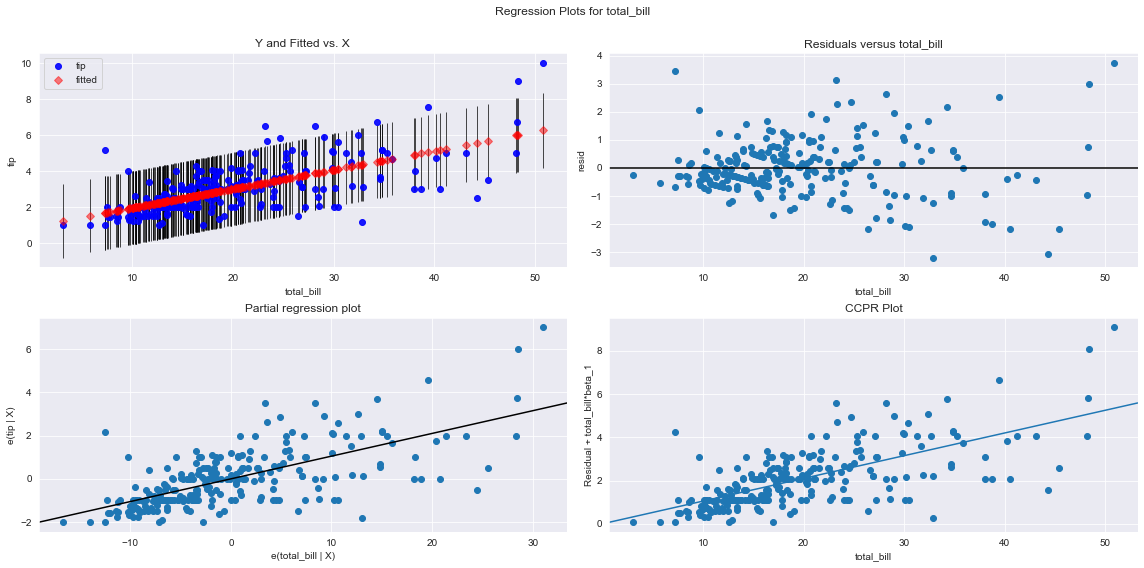

In [16]:
# This produces our four regression plots for total_unemployed

fig = plt.figure(figsize=(16,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(model, "total_bill", fig=fig)

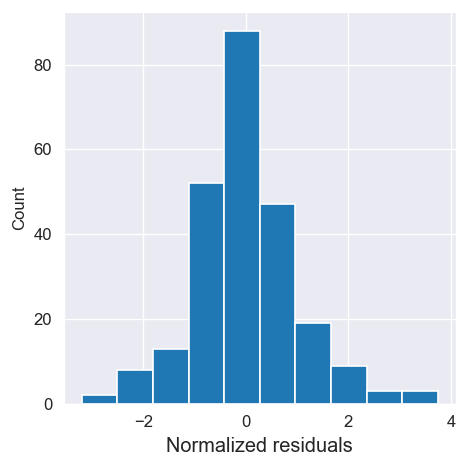

In [17]:
#Histogram of residuals
fig, ax1= plt.subplots(1,1, figsize=(4,4), sharey=True, dpi=120)

#Plot Histogram
ax1.hist(residuals)
ax1.set_ylabel('Count')
ax1.set_xlabel('Normalized residuals',fontsize=12)

plt.tight_layout()

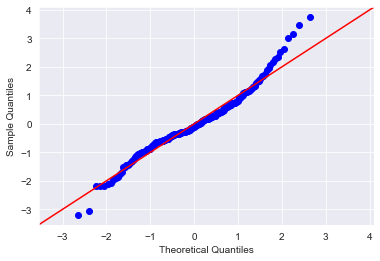

In [18]:
#QQ Plot
fig=sm.qqplot(residuals,line='45')
plt.show()

#We can observe that residuals are not normally distributed

# INFLUENTIAL POINTS

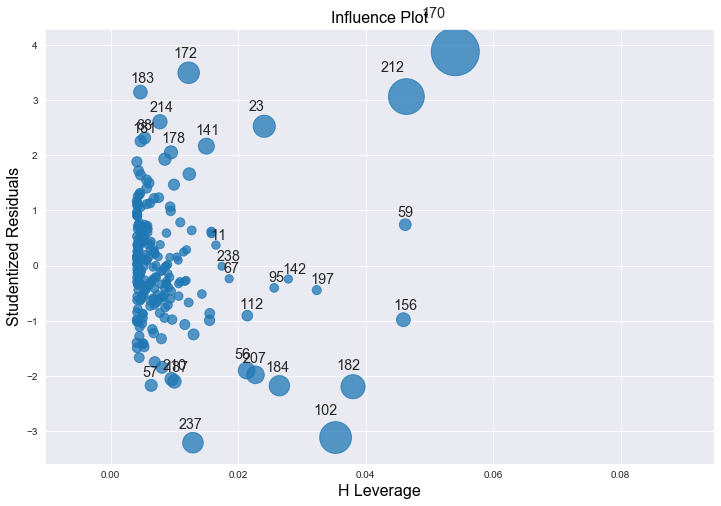

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, ax=ax, criterion="cooks")

C:\Users\ARPIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

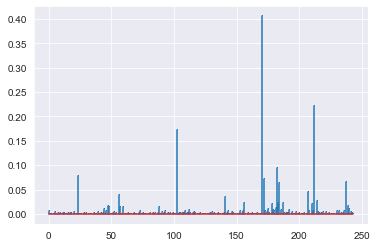

In [20]:
influence = model.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")

https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
    